In [5]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 KB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-nul

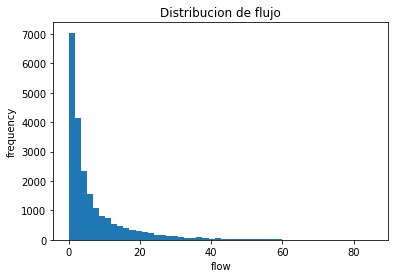

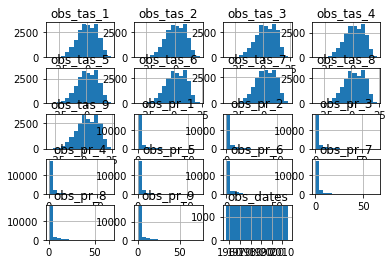

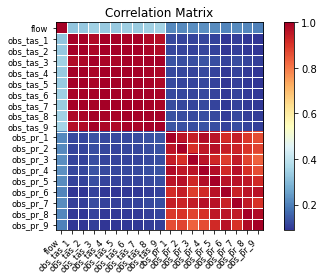

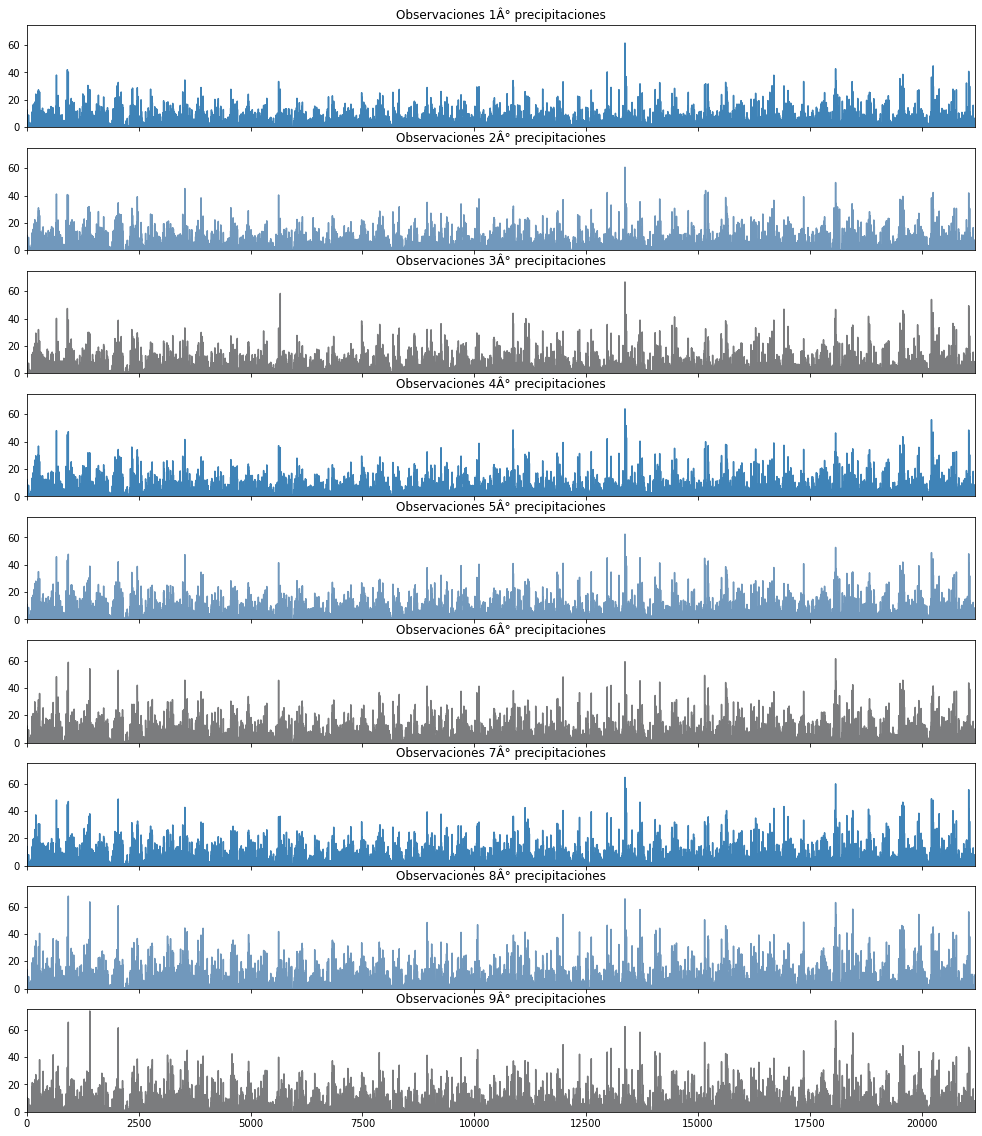

flow
<class 'numpy.ndarray'>
(21542,)
obs_tas
<class 'numpy.ndarray'>
(21546, 9)
flow_dates
<class 'pandas.core.series.Series'>
(21542,)
obs_lon_lat
<class 'list'>
(2,)
obs_pr
<class 'numpy.ndarray'>
(21546, 9)
obs_dates
<class 'pandas.core.series.Series'>
(21546,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21542 entries, 0 to 21541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   flow        21542 non-null  float64       
 1   flow_dates  21542 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 336.7 KB


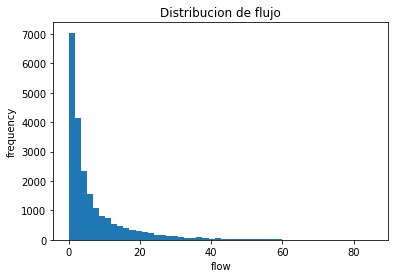

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21546 entries, 0 to 21545
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   obs_tas_1  21546 non-null  float64       
 1   obs_tas_2  21546 non-null  float64       
 2   obs_tas_3  21546 non-null  float64       
 3   obs_tas_4  21546 non-null  float64       
 4   obs_tas_5  21546 non-null  float64       
 5   obs_tas_6  21546 non-null  float64       
 6   obs_tas_7  21546 non-null  float64       
 7   obs_tas_8  21546 non-null  float64       
 8   obs_tas_9  21546 non-null  float64       
 9   obs_pr_1   21546 non-null  float64       
 10  obs_pr_2   21546 non-null  float64       
 11  obs_pr_3   21546 non-null  float64       
 12  obs_pr_4   21546 non-null  float64       
 13  obs_pr_5   21546 non-null  float64       
 14  obs_pr_6   21546 non-null  float64       
 15  obs_pr_7   21546 non-null  float64       
 16  obs_pr_8   21546 non-null  float64      

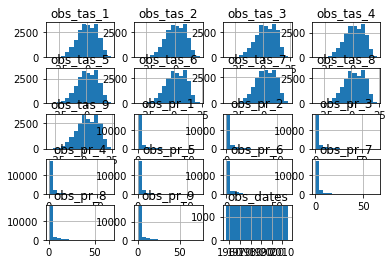

La fecha del registro 8777 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 9495 no está en los datos de temperaturas y precipitaciones.
La fecha del registro 10723 no está en los datos de temperaturas y precipitaciones.
(21178, 2)
(21178, 19)


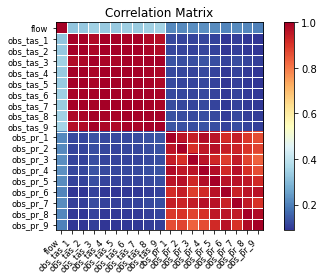

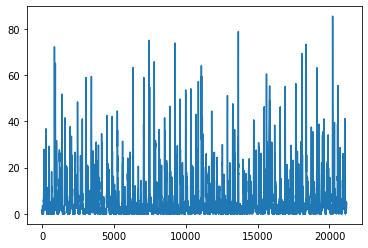

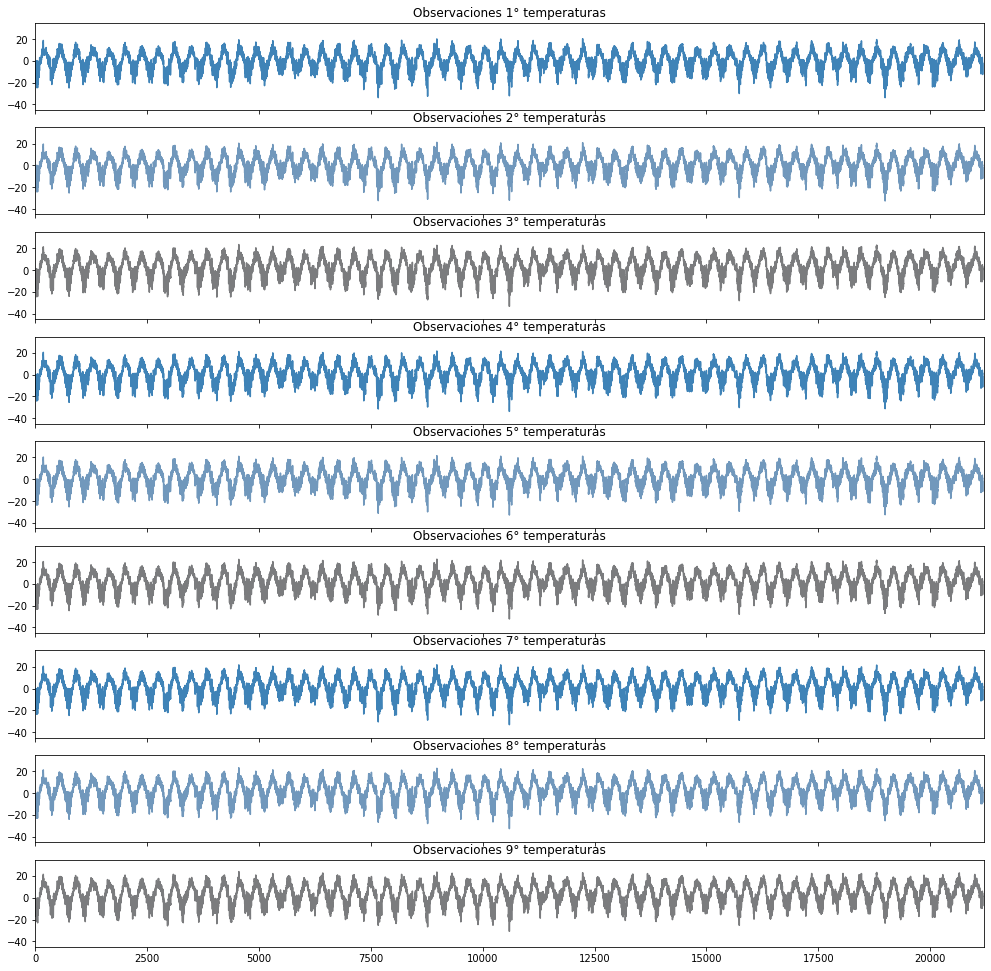

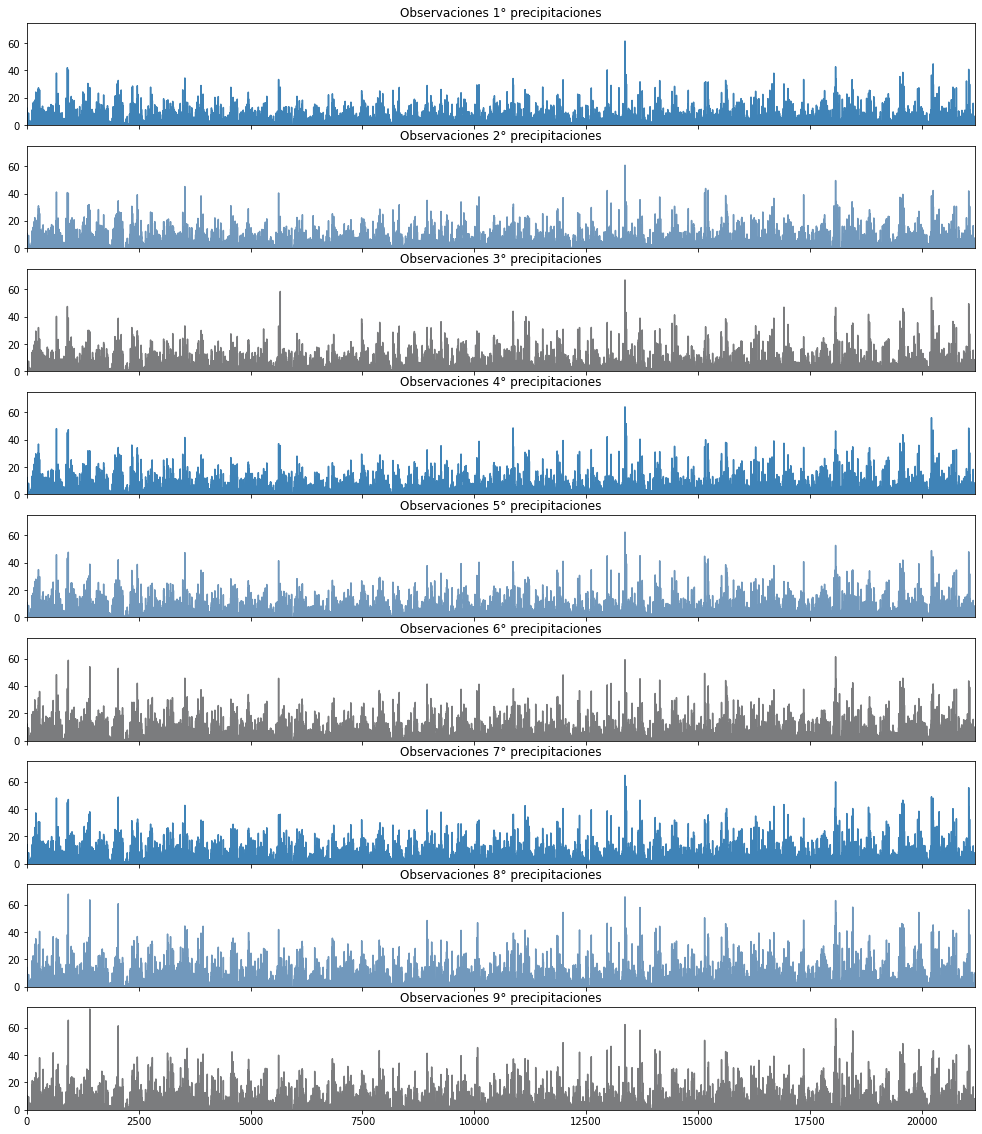

In [1]:
import ipynb.fs.full.Analisis
%run Analisis.ipynb

In [2]:
full_data

,flow,obs_tas_1,obs_tas_2,obs_tas_3,obs_tas_4,obs_tas_5,obs_tas_6,obs_tas_7,obs_tas_8,obs_tas_9,obs_pr_1,obs_pr_2,obs_pr_3,obs_pr_4,obs_pr_5,obs_pr_6,obs_pr_7,obs_pr_8,obs_pr_9,obs_dates
0,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,-12.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958-01-04
1,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,-8.3,2.0,2.2,3.0,3.3,3.7,0.7,3.1,4.2,1.1,1958-01-05
2,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,-5.8,12.7,11.0,16.5,12.5,11.2,12.2,14.1,14.2,10.5,1958-01-06
3,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,-7.4,6.6,6.9,9.6,7.3,6.5,5.2,10.4,5.7,3.7,1958-01-07
4,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,-14.9,3.4,3.6,2.7,3.5,3.8,3.3,2.9,4.0,3.5,1958-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,-7.5,2.2,0.1,1.1,1.5,0.1,0.0,0.0,0.0,0.0,2015-12-27
21174,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,-7.5,5.5,4.9,8.3,6.1,3.7,5.0,5.4,0.0,5.1,2015-12-28
21175,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,-6.3,1.8,1.7,2.1,2.7,0.2,0.8,2.2,0.0,0.0,2015-12-29
21176,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,-3.0,4.1,3.5,4.6,5.1,3.5,3.4,3.2,0.0,3.6,2015-12-30


In [ ]:
Exploración de datos con K-means

In [54]:
X=full_data.loc[:,["obs_tas_1","obs_pr_1"]]

In [55]:
X

,obs_tas_1,obs_pr_1
0,-12.8,0.0
1,-7.8,2.0
2,-11.0,12.7
3,-13.2,6.6
4,-19.9,3.4
...,...,...
21173,-12.5,2.2
21174,-12.5,5.5
21175,-11.9,1.8
21176,-7.0,4.1


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
K = 4

In [63]:
kmeans = KMeans(n_clusters=K).fit(X)

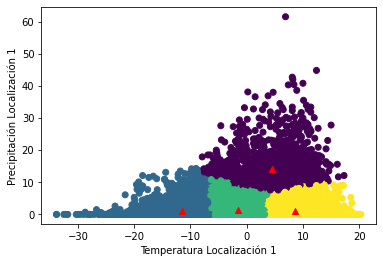

In [67]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c = kmeans.labels_)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker = '^', c = 'r')
plt.xlabel("Temperatura Localización 1")
plt.ylabel("Precipitación Localización 1")
plt.show()